In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = np.linspace(0.1, 10, 100)*1j

In [3]:
Hs = 1/((s+0.1)*(s+1)*(s+10))

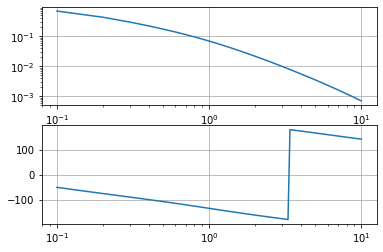

In [20]:
plt.figure()
plt.subplot(211)
plt.plot(abs(s), abs(Hs))
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.subplot(212)
angle = 180*np.angle(Hs)/np.pi
plt.plot(abs(s), angle)
#plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

In [6]:
# routh-Hurwitz
def Routh_hurwitz(coef):
    l = len(coef)
    even = list(coef[0::2][:])
    odd = list(coef[1::2][:])
    for i in range(3):
        if len(even) <= 3:
            even.append(0)
        if len(odd) <= 3:
            odd.append(0)
    curr = odd[:]
    prev = even[:]
    matrix = []
    matrix.append(prev)
    matrix.append(curr)
    for i in range(l-2):
        temp = []
        for j in range(len(curr)-1):
            if abs(curr[0]) <= 1e-3:
                a = 0.01
            else:
                a = curr[0]
            temp.append(-np.linalg.det(np.array([[prev[0] ,prev[j+1]],[a, curr[j+1]]]))/a)
        matrix.append(temp)
        prev = curr[:]
        curr = temp[:]
    for i in matrix:
        print(i)
        

In [9]:
Routh_hurwitz((1,3,10,1030))

[1, 10, 0, 0]
[3, 1030, 0, 0]
[-333.33333333333354, -0.0, -0.0]
[1029.999999999999, 0.0]
